# 1. Install Required Packages (Optional)

In [ ]:
# Install all required packages
# source("pkg.R")

# 2. Load Data (Q12005, Q22005)

In [1]:
source("Classification_preprocess.R")

In [2]:
# load data for Q12005
# 0.01 for sampling percentage
dummydata <- preprocess_classification("Q1", "2005", 0.01)
invisible(gc())
# summary(dummydata)
# str(dummydata)
# names(dummydata)
str(dummydata)

Read 25884838 rows and 23 (of 23) columns from 1.454 GB file in 00:00:39


Loading required package: ParamHelpers


'data.frame':	258848 obs. of  23 variables:
 $ current_upb      : num  106472 42000 298768 77000 58838 ...
 $ loan_age         : int  49 4 13 1 35 58 93 38 98 117 ...
 $ mths_remng       : int  191 356 356 359 145 182 267 322 82 63 ...
 $ current_int_rt   : num  5.5 6 5.88 5.75 5.5 ...
 $ non_int_brng_upb : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mi_recoveries    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ net_sale_proceeds: num  0 0 0 0 0 0 0 0 0 0 ...
 $ non_mi_recoveries: num  0 0 0 0 0 0 0 0 0 0 ...
 $ expenses         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ legal_costs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ maint_pres_costs : num  0 0 0 0 0 0 0 0 0 0 ...
 $ taxes_ins_costs  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ misc_costs       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ actual_loss      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ modcost          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ delq_sts.Y       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ flag_mod.Y       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ repch_flag.O     : num  1 1 1 1 1 1 1 1 1 1 ...

In [3]:
# do the same to load data for Q22005
testdata <- preprocess_classification("Q2", "2005", 0.01)
str(testdata)

Read 29161109 rows and 23 (of 23) columns from 1.638 GB file in 00:00:45
'data.frame':	291611 obs. of  23 variables:
 $ current_upb      : num  104066 194179 109000 51947 144407 ...
 $ loan_age         : int  115 126 5 64 30 13 31 7 17 3 ...
 $ mths_remng       : int  125 234 355 296 150 167 329 353 163 177 ...
 $ current_int_rt   : num  6.12 5.62 5.88 6.38 4.88 ...
 $ non_int_brng_upb : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mi_recoveries    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ net_sale_proceeds: num  0 0 0 0 0 0 0 0 0 0 ...
 $ non_mi_recoveries: num  0 0 0 0 0 0 0 0 0 0 ...
 $ expenses         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ legal_costs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ maint_pres_costs : num  0 0 0 0 0 0 0 0 0 0 ...
 $ taxes_ins_costs  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ misc_costs       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ actual_loss      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ modcost          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ delq_sts.Y       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ flag_mod.Y      

# 3. Logistic Regression

In [4]:
# Logistic regression
# Y: delq_sts
table(dummydata$delq_sts.Y)


     0      1 
247954  10894 

## 3.1 Using All Varibles

In [5]:
## Using all variables
lr.full <- glm(delq_sts.Y ~ ., data = dummydata, family = binomial(link = "logit"))
summary(lr.full)


Call:
glm(formula = delq_sts.Y ~ ., family = binomial(link = "logit"), 
    data = dummydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5953  -0.3112  -0.2348  -0.1831   3.3327  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        7.722e+00  3.785e+02   0.020   0.9837    
current_upb        2.309e-06  1.338e-07  17.255   <2e-16 ***
loan_age           2.417e-02  2.949e-04  81.938   <2e-16 ***
mths_remng         4.807e-03  1.487e-04  32.320   <2e-16 ***
current_int_rt     2.109e-01  1.842e-02  11.451   <2e-16 ***
non_int_brng_upb  -7.121e-06  2.229e-06  -3.195   0.0014 ** 
mi_recoveries     -3.108e-07  2.816e-03   0.000   0.9999    
net_sale_proceeds  7.896e-07  7.431e-04   0.001   0.9992    
non_mi_recoveries -6.649e-07  3.180e-03   0.000   0.9998    
expenses           5.254e-02  7.308e+01   0.001   0.9994    
legal_costs       -5.251e-02  7.308e+01  -0.001   0.9994    
maint_pres_costs  -5.254e-02  7.308e+01  -0.

## 3.2 Using Significant Variables

In [6]:
## signif: current_upb + loan_age + mths_remng + current_int_rt + non_int_brng_upb + flag_mod.Y
## Using significant variables
lr.signif <- glm(delq_sts.Y ~ current_upb + loan_age + mths_remng + current_int_rt + non_int_brng_upb + flag_mod.Y, data = dummydata, family = binomial(link = "logit"))
summary(lr.signif)


Call:
glm(formula = delq_sts.Y ~ current_upb + loan_age + mths_remng + 
    current_int_rt + non_int_brng_upb + flag_mod.Y, family = binomial(link = "logit"), 
    data = dummydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5686  -0.3135  -0.2396  -0.1913   3.4980  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -6.116e+00  1.123e-01 -54.458  < 2e-16 ***
current_upb       1.912e-06  1.314e-07  14.548  < 2e-16 ***
loan_age          2.268e-02  2.896e-04  78.318  < 2e-16 ***
mths_remng        4.273e-03  1.411e-04  30.283  < 2e-16 ***
current_int_rt    3.622e-02  1.674e-02   2.163   0.0305 *  
non_int_brng_upb -1.099e-05  2.299e-06  -4.781 1.75e-06 ***
flag_mod.Y        6.639e+00  7.196e-01   9.227  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 90348  on 258847  degrees of freedom
Residual deviance: 83094  

## 3.3 Evaluation of Model (Logistic Regression)

### 3.3.1 Confusion Matrix

#### 3.3.1.1 Analysis on Training data 

In [8]:
## Evaluatioin
## Confusion Matrix for training data
lr.train.probs <- predict(lr.signif, dummydata, type = 'response')
lr.train.pred <- rep(0, length(lr.train.probs))
### Set the cutoff value to 0.5
lr.train.pred[lr.train.probs >= 0.5] <- 1
library(caret)
confusionMatrix(lr.train.pred, dummydata$delq_sts.Y)
#           Reference
# Prediction      0      1
#          0 247952  10771
#          1      2    123 
# Accuracy : 0.958381

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 247952  10771
         1      2    123
                                          
               Accuracy : 0.9584          
                 95% CI : (0.9576, 0.9591)
    No Information Rate : 0.9579          
    P-Value [Acc > NIR] : 0.119           
                                          
                  Kappa : 0.0214          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99999         
            Specificity : 0.01129         
         Pos Pred Value : 0.95837         
         Neg Pred Value : 0.98400         
             Prevalence : 0.95791         
         Detection Rate : 0.95791         
   Detection Prevalence : 0.99952         
      Balanced Accuracy : 0.50564         
                                          
       'Positive' Class : 0               
                                          

#### 3.3.1.2 Analysis on Test data 

In [9]:
## Confusion Matrix for test data
lr.test.probs <- predict(lr.signif, testdata, type = 'response')
lr.test.pred <- rep(0, length(lr.test.probs))
### Set the cutoff value to 0.5
lr.test.pred[lr.test.probs >= 0.5] <- 1
library(caret)
confusionMatrix(lr.test.pred, testdata$delq_sts.Y)
#           Reference
# Prediction      0      1
#          0 277993  13481
#          1      9    128
# Accuracy : 0.9537397

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 277993  13481
         1      9    128
                                         
               Accuracy : 0.9537         
                 95% CI : (0.953, 0.9545)
    No Information Rate : 0.9533         
    P-Value [Acc > NIR] : 0.1491         
                                         
                  Kappa : 0.0177         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.999968       
            Specificity : 0.009406       
         Pos Pred Value : 0.953749       
         Neg Pred Value : 0.934307       
             Prevalence : 0.953332       
         Detection Rate : 0.953301       
   Detection Prevalence : 0.999530       
      Balanced Accuracy : 0.504687       
                                         
       'Positive' Class : 0              
                                         

### 3.3.2 ROC

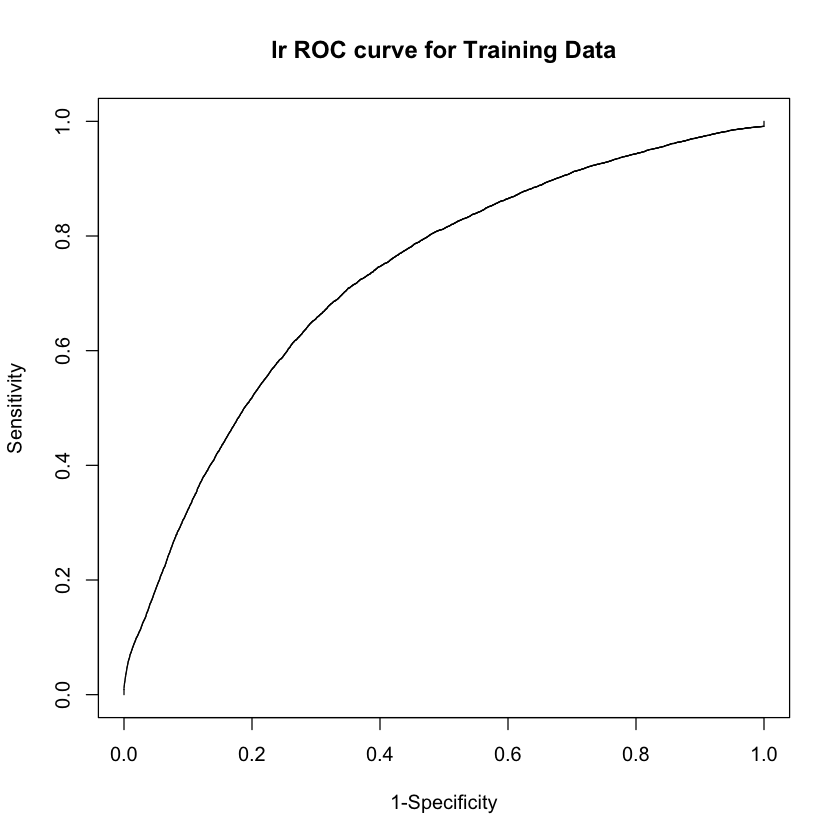

In [11]:
## ROC for training data
library(ROCR)
predict.train <- ROCR::prediction(lr.train.probs, dummydata$delq_sts.Y)
performance.train <- performance(predict.train, measure = "tpr", x.measure = "fpr")
plot(performance.train, main="lr ROC curve for Training Data", xlab = "1-Specificity", ylab="Sensitivity")

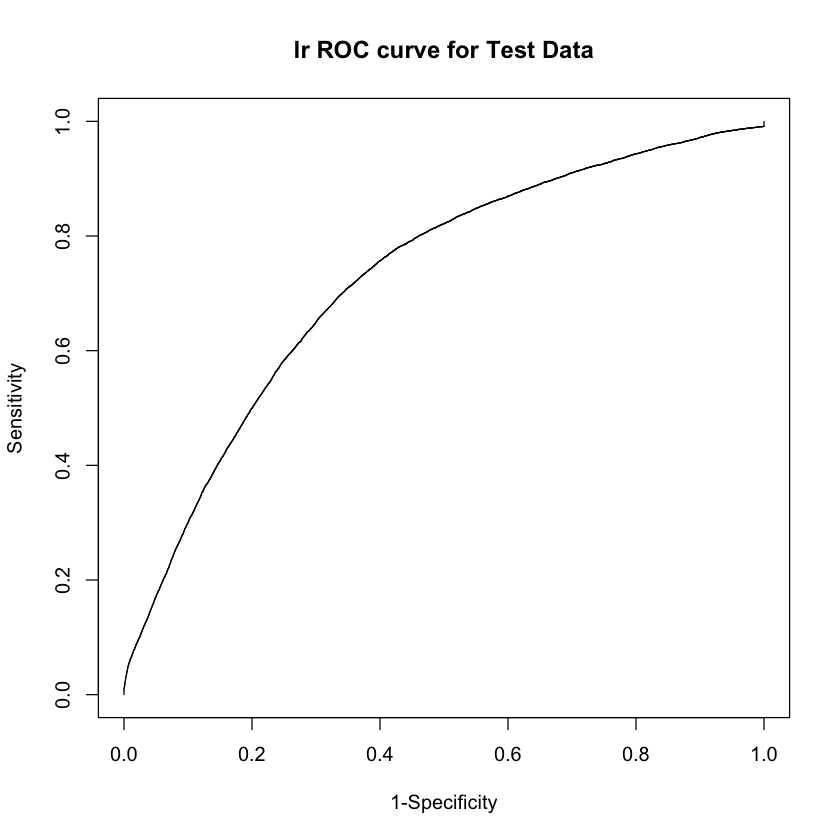

In [12]:
## ROC for test data
predict.test <- ROCR::prediction(lr.test.probs, testdata$delq_sts.Y)
performance.test <- performance(predict.test, measure = "tpr", x.measure = "fpr")
plot(performance.test, main="lr ROC curve for Test Data", xlab = "1-Specificity", ylab="Sensitivity")

# 4. Classification Tree

## 4.1 Build Model

In [13]:
# Classification Tree
tree.traindata <- dummydata
tree.testdata <- testdata
tree.traindata$delq_sts.Y <- factor(tree.traindata$delq_sts.Y, levels=c(0, 1), labels = c("N", "Y"))
tree.testdata$delq_sts.Y <- factor(tree.testdata$delq_sts.Y, levels=c(0, 1), labels = c("N", "Y"))
table(tree.testdata$delq_sts.Y)


     N      Y 
278002  13609 


Classification tree:
tree(formula = delq_sts.Y ~ ., data = tree.traindata)
Variables actually used in tree construction:
[1] "loan_age"   "mths_remng"
Number of terminal nodes:  3 
Residual mean deviance:  0.3243 = 83930 / 258800 
Misclassification error rate: 0.04209 = 10894 / 258848 

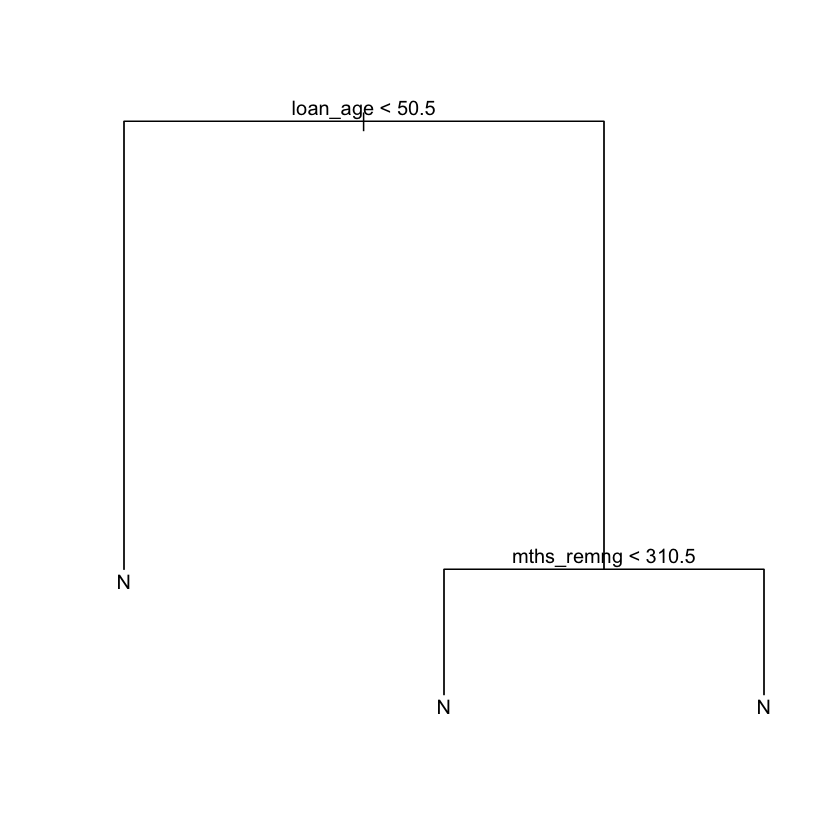

In [14]:
library(tree)
tree = tree(delq_sts.Y ~ ., tree.traindata)
summary(tree)
plot(tree)
text(tree, pretty = 0)

## 4.2 Evaluation (Tree)

### 4.2.1 Confusion Matrix

In [15]:
# Evaluation
## Confusion Matrix
tree.pred = predict(tree, tree.testdata, type = "class")
confusionMatrix(tree.pred, tree.testdata$delq_sts.Y)
#           Reference
# Prediction      N      Y
#          N 278002  13609
#          Y      0      0
# Accuracy : 0.9533317
# Really bad, right?

Confusion Matrix and Statistics

          Reference
Prediction      N      Y
         N 278002  13609
         Y      0      0
                                          
               Accuracy : 0.9533          
                 95% CI : (0.9526, 0.9541)
    No Information Rate : 0.9533          
    P-Value [Acc > NIR] : 0.5023          
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.9533          
         Neg Pred Value :    NaN          
             Prevalence : 0.9533          
         Detection Rate : 0.9533          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : N               
                                          

### 4.2.2 ROC

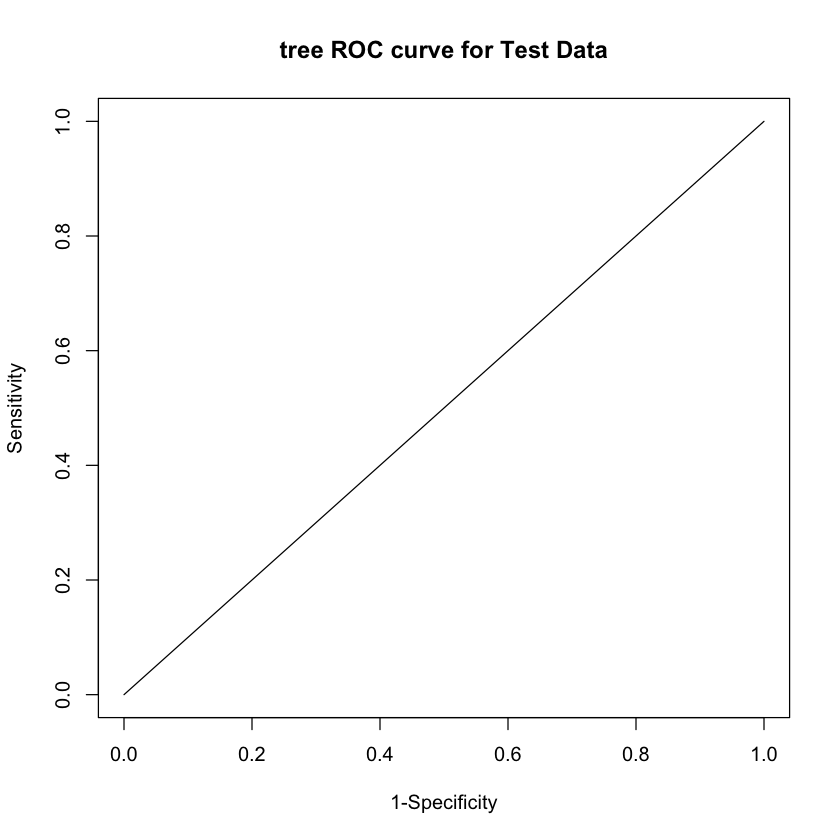

In [16]:
## ROC for test data
predict.tree.test <- ROCR::prediction(as.numeric(tree.pred), tree.testdata$delq_sts.Y)
performance.tree.test <- performance(predict.tree.test, measure = "tpr", x.measure = "fpr")
plot(performance.tree.test, main="tree ROC curve for Test Data", xlab = "1-Specificity", ylab="Sensitivity")

# 5. Neural Network

## 5.1 Build Model

In [17]:
# Neural Network
# This step will take a long time
library(neuralnet)
## all variables
n <- names(dummydata)
f <- as.formula(paste("delq_sts.Y ~", paste(n[!n %in% "delq_sts.Y"], collapse = " + ")))
neuralnet <- neuralnet(f, data = dummydata, hidden=3, err.fct="sse", linear.output = FALSE)
# plot(neuralnet)


Attaching package: ‘neuralnet’

The following object is masked from ‘package:ROCR’:

    prediction



## 5.2 Evaluation (Net)

### 5.2.1 Confusion Matrix

In [18]:
## Evaluation
net.pred <- compute(neuralnet, testdata[,-16])
net.result <- net.pred$net.result

## Confusion Matrix
net.test.pred <- rep(0, length(net.result))
### Set the cutoff value to 0.5
net.test.pred[net.result >= 0.5] <- 1
library(caret)
confusionMatrix(net.test.pred, testdata$delq_sts.Y)
#           Reference
# Prediction      0      1
#          0 278001  13411
#          1      1    198
# Accuracy : 0.9540072

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 278001  13411
         1      1    198
                                                
               Accuracy : 0.9540072             
                 95% CI : (0.9532407, 0.9547647)
    No Information Rate : 0.9533317             
    P-Value [Acc > NIR] : 0.04201252            
                                                
                  Kappa : 0.0273707             
 Mcnemar's Test P-Value : < 0.000000000000000222
                                                
            Sensitivity : 0.9999964             
            Specificity : 0.0145492             
         Pos Pred Value : 0.9539792             
         Neg Pred Value : 0.9949749             
             Prevalence : 0.9533317             
         Detection Rate : 0.9533282             
   Detection Prevalence : 0.9993176             
      Balanced Accuracy : 0.5072728             
                                       

### 5.2.2 ROC

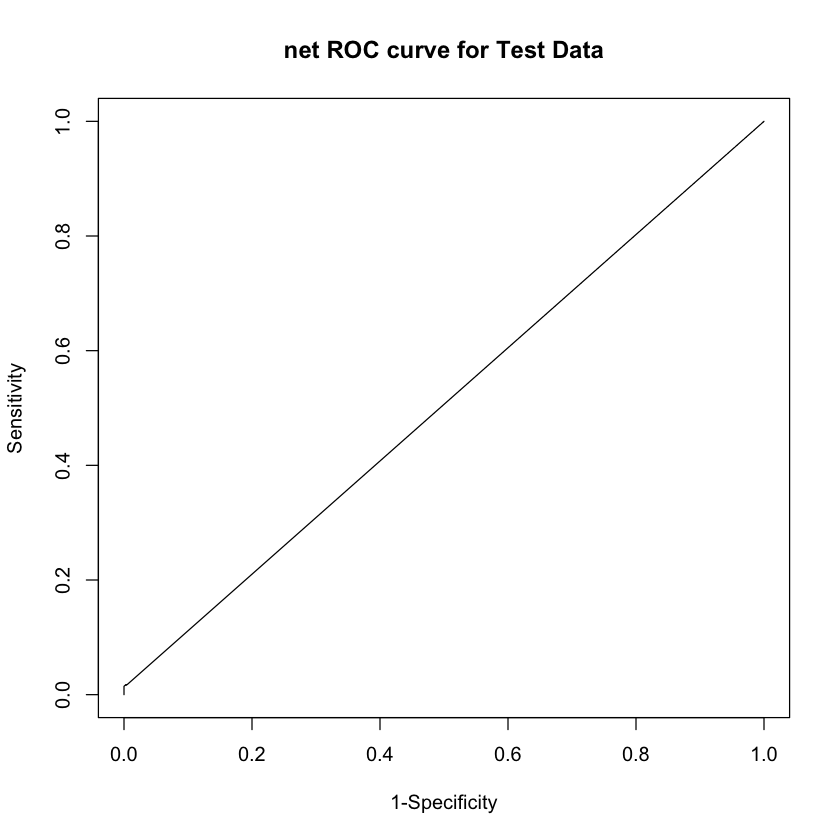

In [19]:
## ROC
## Bad ROC curve
predict.net.test <- ROCR::prediction(net.result, testdata$delq_sts.Y)
performance.net.test <- performance(predict.net.test, measure = "tpr", x.measure = "fpr")
plot(performance.net.test, main="net ROC curve for Test Data", xlab = "1-Specificity", ylab="Sensitivity")

# 6. Random Forest (too slow using only 1%)

## 6.1 Build Forest

In [21]:
# Random Forest
# install.packages("randomForest")
library(randomForest)

In [22]:
# sampling (1%) for dummydata
smp_size <- floor(0.01 * nrow(dummydata))
set.seed(21)
index <- sample(1:nrow(dummydata), size = smp_size)
forest.dummydata <- dummydata[index, ]
# sampling (1%) for testdata
smp_size <- floor(0.01 * nrow(testdata))
set.seed(21)
index <- sample(1:nrow(testdata), size = smp_size)
forest.testdata <- testdata[index, ]

In [23]:
## Create Forest
forest <- randomForest(as.factor(delq_sts.Y)~., forest.dummydata)
forest


Call:
 randomForest(formula = as.factor(delq_sts.Y) ~ ., data = forest.dummydata) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 3.94%
Confusion matrix:
     0 1  class.error
0 2485 0 0.0000000000
1  102 1 0.9902912621

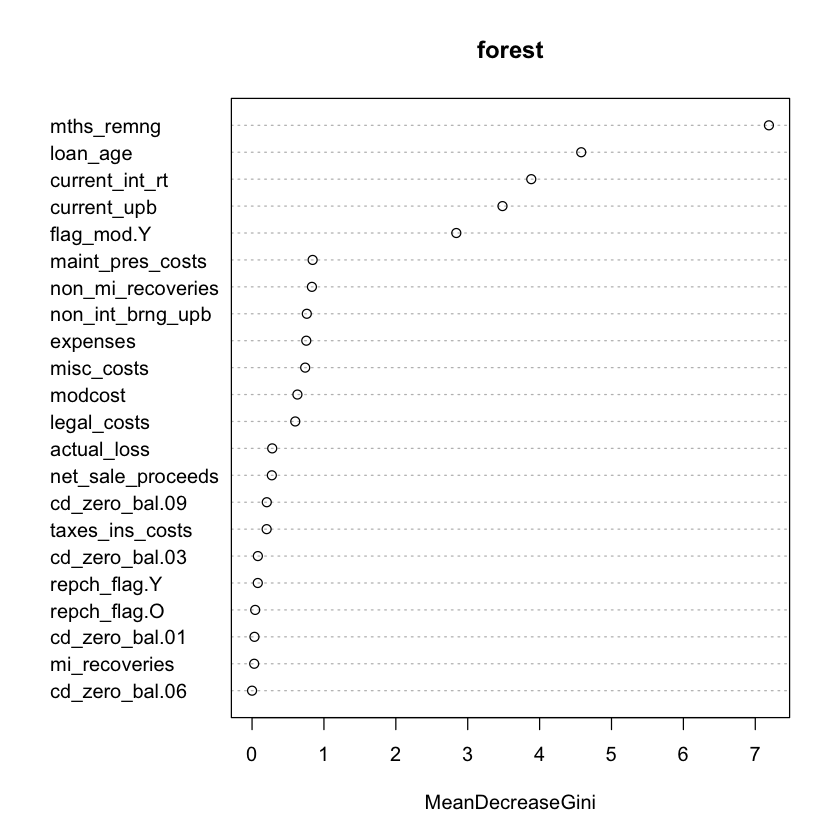

In [24]:
# variable importance
varImpPlot(forest)
## plot
# plot(random.delq_sts.Y)

## 6.2 Evaluation (Forest)

In [25]:
## Evaluation of Random Forest
library(caret)
## Confusion Matrix
forest.pred = predict(forest, forest.testdata, type = "class")
confusionMatrix(forest.pred, forest.testdata$delq_sts.Y)
#           Reference
# Prediction     0     1
#          0 19075   919
#          1     0     6
# Accuracy : 0.954

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2753  159
         1    0    4
                                                
               Accuracy : 0.9454733             
                 95% CI : (0.9366033, 0.9534353)
    No Information Rate : 0.9441015             
    P-Value [Acc > NIR] : 0.3931542             
                                                
                  Kappa : 0.0453479             
 Mcnemar's Test P-Value : < 0.00000000000000022 
                                                
            Sensitivity : 1.00000000            
            Specificity : 0.02453988            
         Pos Pred Value : 0.94539835            
         Neg Pred Value : 1.00000000            
             Prevalence : 0.94410151            
         Detection Rate : 0.94410151            
   Detection Prevalence : 0.99862826            
      Balanced Accuracy : 0.51226994            
                                                
  

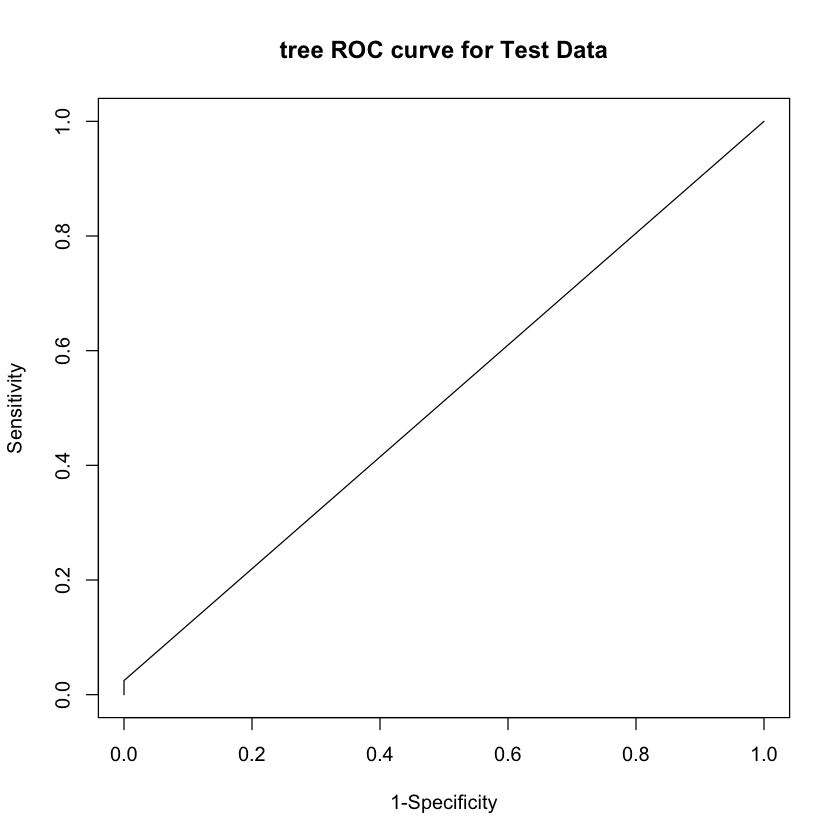

In [26]:
## ROC for test data
library(ROCR)
predict.forest.test <- ROCR::prediction(as.numeric(forest.pred), forest.testdata$delq_sts.Y)
performance.forest.test <- ROCR::performance(predict.forest.test, measure = "tpr",  x.measure = "fpr")
ROCR::plot(performance.forest.test, main="tree ROC curve for Test Data", xlab = "1-Specificity", ylab="Sensitivity")

# 7. Auto-Classification from 1999 to 2016

In [27]:
source("Classification_preprocess.R")
source("Classification_auto.R")

In [28]:
# Test for Q12005 and Q22005
# Test demo
Q12005_Q22005 <- auto_classification("Q1", "2005", "Q2", "2005", 0.01)
Q12005_Q22005

Read 25884838 rows and 23 (of 23) columns from 1.454 GB file in 00:00:36
Read 29161109 rows and 23 (of 23) columns from 1.638 GB file in 00:00:41


,actual_delq,predict_delq,records,proper_delq,improper_delq
Q22005,13609,137,291611,128,9


In [ ]:
# Simply run this block will output a csv file named "result_99to16_2M.csv"
# source("Classification_99to16.R")